![alt text](https://toothlens.com/wp-content/uploads/2022/02/Toothlens_footer_Logo-e1644900904159.png)



# Application Task

## Age Estimation
The following task consist of designing, training and evaluating a neural network for age estimation of face images. For this task there is not any predefined code and you are completely free to prototype it by yourself. Instead of solving the age prediction task as a label classification problem, we want to estimate the age from a predicted distribution (see the figure below, where the age label $43$ is plotted as a distribution $\mathcal{N}(43,9)$).

![alt text](https://drive.google.com/uc?id=125fuZLgtaszXfV9FNppTBDUrGR2EJ9O5)


## References
1. [UTK Face Dataset](https://susanqq.github.io/UTKFace/)

### Imports

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator


### Loading Data

In [3]:
ages = []
images = []

for i in os.listdir('utk_sample/'):
    split = i.split('_')
    # print(split)
    ages.append(int(split[0]))
    images.append(Image.open('utk_sample/' + i))

In [4]:
type(images)

list

In [5]:
images = pd.Series(images, name='Images')
ages = pd.Series(ages, name='Ages')

data = pd.concat([images, ages], axis=1)
data.head(10)

,Images,Ages
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,100
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10
5,<PIL.JpegImagePlugin.JpegImageFile image mode=...,11
6,<PIL.JpegImagePlugin.JpegImageFile image mode=...,11
7,<PIL.JpegImagePlugin.JpegImageFile image mode=...,11
8,<PIL.JpegImagePlugin.JpegImageFile image mode=...,12
9,<PIL.JpegImagePlugin.JpegImageFile image mode=...,12


### Lets visualize the data

<AxesSubplot: xlabel='Ages', ylabel='Count'>

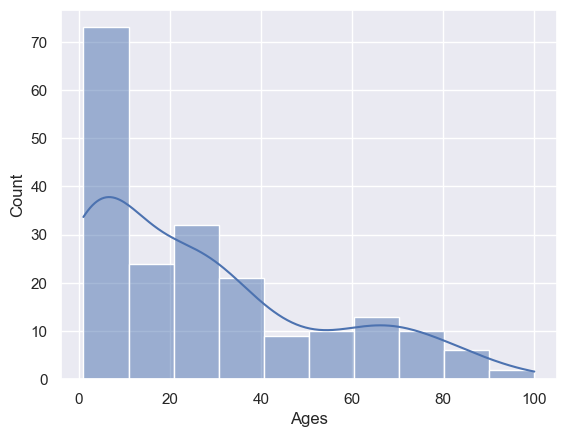

In [6]:
sns.set_theme()
sns.histplot(data['Ages'], bins=10, kde=True)

<AxesSubplot: >

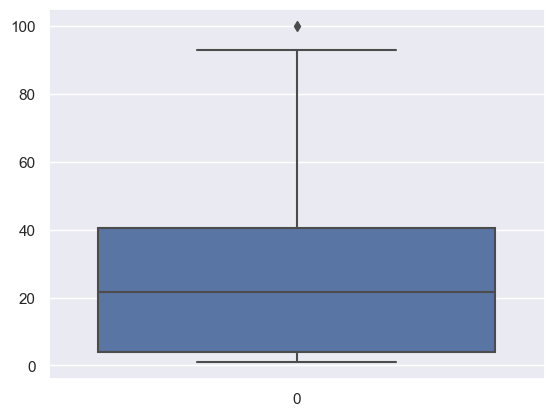

In [7]:
sns.boxplot(data=data['Ages'])

### Exploratory Data Analysis

In [7]:
data[data.Ages > 80].count()[0]

8

##### SInce there are merely 8 data points as we go above the age of 80, clearly visible in the box plot, we will be dropping out those data points as it might affect the accuracy of the model for the age above 80.

In [8]:
data = data[data.Ages < 80]

<AxesSubplot: xlabel='Ages', ylabel='Count'>

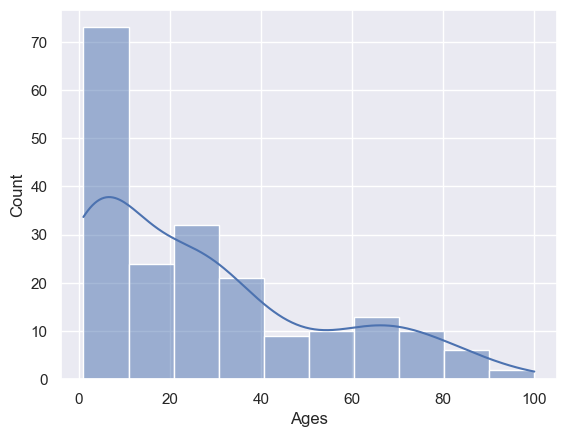

In [8]:
sns.histplot(data['Ages'], bins=10, kde=True)

### Train Test Split

In [12]:
X = []

for i in range(len(data)):
    data['Images'].iloc[i] = data['Images'].iloc[i].resize((200,200), Image.Resampling.LANCZOS)
    ar = np.asarray(data['Images'].iloc[i])
    X.append(ar)
X = np.array(X)

C:\Users\Karan\AppData\Local\Temp\ipykernel_8456\3150053568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Images'].iloc[i] = data['Images'].iloc[i].resize((200,200), Image.Resampling.LANCZOS)


In [13]:
y = data['Ages']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Creating the model

In [14]:
agemodel = Sequential()
agemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(64, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(128, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='relu'))

agemodel.compile(loss='mean_squared_error',
             optimizer=optimizers.Adam(lr=0.0001))


C:\Users\Karan\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


### Training the model

In [14]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train1 = datagen.flow(X_train, y_train, batch_size=32)

test1 = test_datagen.flow(X_test, y_test, batch_size=32)

history1 = agemodel.fit(train1, epochs=50, shuffle=True, validation_data=test1)


Epoch 1/50
5/5 [==============================] - 5s 756ms/step - loss: 917.8800 - val_loss: 1116.4259
Epoch 2/50
5/5 [==============================] - 4s 706ms/step - loss: 771.9042 - val_loss: 883.0776
Epoch 3/50
5/5 [==============================] - 3s 613ms/step - loss: 600.0431 - val_loss: 663.2650
Epoch 4/50
5/5 [==============================] - 3s 699ms/step - loss: 502.8792 - val_loss: 636.7215
Epoch 5/50
5/5 [==============================] - 3s 564ms/step - loss: 564.1299 - val_loss: 633.7299
Epoch 6/50
5/5 [==============================] - 3s 620ms/step - loss: 498.7299 - val_loss: 649.4011
Epoch 7/50
5/5 [==============================] - 3s 603ms/step - loss: 546.7490 - val_loss: 673.6244
Epoch 8/50
5/5 [==============================] - 3s 677ms/step - loss: 494.9679 - val_loss: 646.5417
Epoch 9/50
5/5 [==============================] - 3s 620ms/step - loss: 488.6323 - val_loss: 630.2873
Epoch 10/50
5/5 [==============================] - 3s 617ms/step - loss: 510.0598

### Evaluating the model

In [15]:
def processAndPredict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((200,200), Image.ANTIALIAS)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
            
    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 200, 200, 3)
    
    age = agemodel.predict(ar)
        
    print('Age:', int(age))
    return im.resize((300,300), Image.ANTIALIAS)

### We can use the above function to validate images

In [16]:
# processAndPredict('filepath')